In [1]:
import pandas as pd
import numpy as np; np.random.seed(0)
from scipy import stats
import statsmodels
import statsmodels.api as sm
import seaborn as sns; sns.set()
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('classic')
%matplotlib inline


Bad key text.latex.preview in file /usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when

In [5]:
# Load selection data
data = pd.read_csv('selections.csv')
# # Randomly select one outcome from each selection pair
# for i in np.arange(0,len(data),2):
#     data.drop([i,i+1][np.random.randint(2)],inplace=True)
# ytrain = data['Outcome']
# corr = data.corr()
# data = data.drop(['Outcome'], axis=1)

In [6]:
data

,Category,Gender,Age,Employment,Education,Income,Race,Interest,SSI,Altruism,Treatment,Outcome
0,3,1,1,4,4,3,2,3,4,37,0,1
1,3,1,1,4,4,3,2,3,4,37,1,0
2,1,1,1,4,4,3,2,2,4,37,0,1
3,1,1,1,4,4,3,2,2,4,37,1,0
4,1,1,0,4,4,3,2,2,29,65,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1159,1,1,0,4,2,2,2,2,42,9,0,0
1160,1,2,1,3,3,3,2,2,11,25,1,1
1161,1,2,1,3,3,3,2,2,11,25,0,0
1162,3,2,1,3,3,3,2,1,11,25,1,1


In [3]:
# Pre-process independent variables
for column in data.columns[:7]:
    dummy_df = pd.get_dummies(data[column],prefix=column, drop_first=True)
    for dummy in dummy_df.columns:
        data[dummy] = dummy_df[dummy]
data = data.drop(data.columns[:7], axis=1)
Xtrain = data.copy()


## Model 1

In [5]:
log_reg = sm.Logit(ytrain, data['Treatment']).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.685208
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  582
Model:                          Logit   Df Residuals:                      581
Method:                           MLE   Df Model:                            0
Date:                Mon, 16 Aug 2021   Pseudo R-squ.:                 0.01003
Time:                        13:53:28   Log-Likelihood:                -398.79
converged:                       True   LL-Null:                       -402.83
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Treatment      0.3644      0.121      3.015      0.003       0.128       0.601


## Model 2

In [6]:
log_reg = sm.Logit(ytrain, data[['Treatment', 'Altruism', 'SSI', 'Interest']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.684249
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  582
Model:                          Logit   Df Residuals:                      578
Method:                           MLE   Df Model:                            3
Date:                Mon, 16 Aug 2021   Pseudo R-squ.:                 0.01141
Time:                        13:53:28   Log-Likelihood:                -398.23
converged:                       True   LL-Null:                       -402.83
Covariance Type:            nonrobust   LLR p-value:                   0.02680
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Treatment      0.4553      0.162      2.811      0.005       0.138       0.773
Altruism      -0.0035      0.

## Model 3

In [7]:
log_reg = sm.Logit(ytrain, Xtrain).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.667997
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  582
Model:                          Logit   Df Residuals:                      552
Method:                           MLE   Df Model:                           29
Date:                Mon, 16 Aug 2021   Pseudo R-squ.:                 0.03489
Time:                        13:53:29   Log-Likelihood:                -388.77
converged:                       True   LL-Null:                       -402.83
Covariance Type:            nonrobust   LLR p-value:                    0.5119
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Interest         0.1650      0.141      1.171      0.241      -0.111       0.441
SSI              0.0019

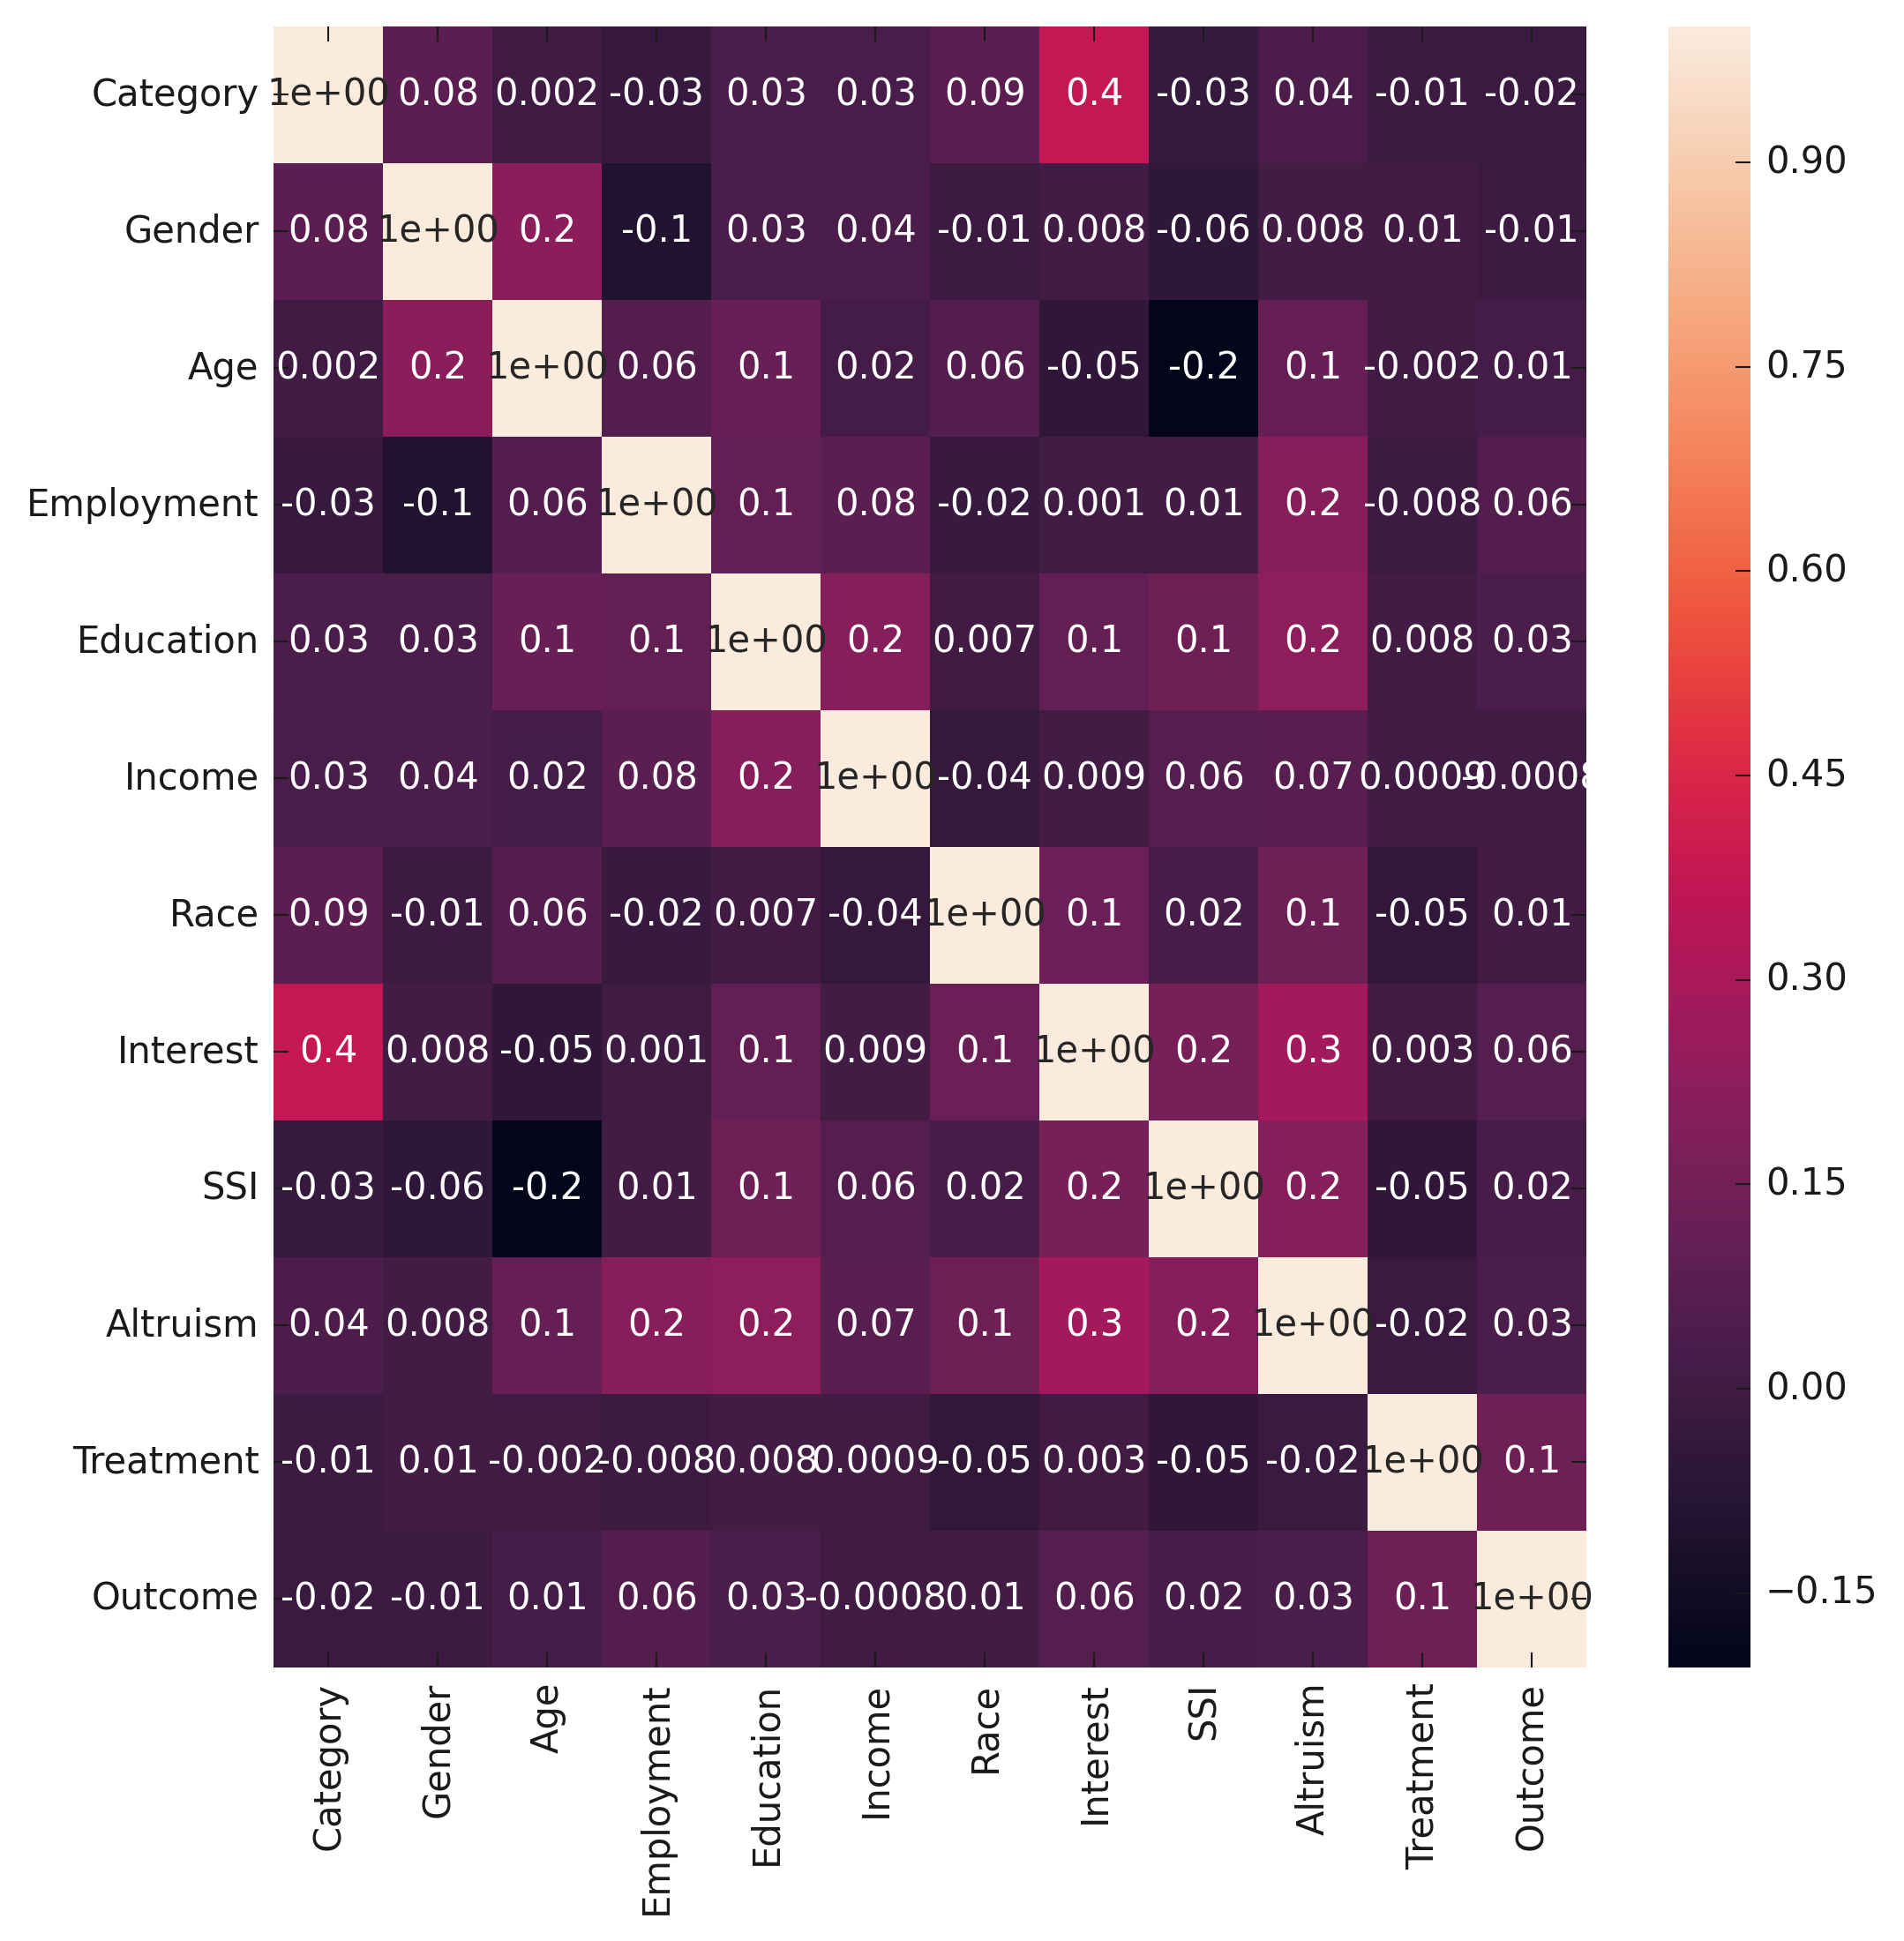

In [22]:
fig = plt.figure(figsize=(8,8), dpi=300)
sns.heatmap(corr,annot=True, fmt='.1');

In [18]:
stats.pearsonr(data['Interest'], data['Altruism'])

(0.28743517661452456, 1.5595591524641617e-12)

In [19]:
stats.pearsonr(data['Interest'], data['SSI'])

(0.16679898543762134, 5.2618297067876635e-05)

In [20]:
stats.pearsonr(data['SSI'], data['Altruism'])

(0.20483833922634326, 6.22904493488671e-07)

In [27]:
Xtrain.groupby('Treatment').agg(['mean', 'std']).T

Treatment              0      1
Interest     mean 2.144  2.148 
             std  0.757  0.798 
SSI          mean 34.502 32.929
             std  15.102 14.462
Altruism     mean 38.699 38.173
             std  13.080 12.914
Category_1   mean 0.254  0.247 
             std  0.436  0.432 
Category_2   mean 0.254  0.254 
             std  0.436  0.436 
Category_3   mean 0.247  0.240 
             std  0.432  0.428 
Gender_1     mean 0.592  0.558 
             std  0.492  0.497 
Gender_2     mean 0.401  0.424 
             std  0.491  0.495 
Age_1        mean 0.642  0.597 
             std  0.480  0.491 
Age_2        mean 0.120  0.145 
             std  0.326  0.353 
Age_3        mean 0.023  0.021 
             std  0.151  0.144 
Employment_1 mean 0.007  0.004 
             std  0.082  0.059 
Employment_2 mean 0.033  0.064 
             std  0.180  0.244 
Employment_3 mean 0.110  0.092 
             std  0.314  0.289 
Employment_4 mean 0.763  0.756 
             std  0.426  0.430 
Employment_5 mean 0.027  0.028 
             std  0.162  0.166 
Education_2  mean 0.221  0.205 
             std  0.415  0.404 
Education_3  mean 0.030  0.028 
             std  0.171  0.166 
Education_4  mean 0.562  0.523 
             std  0.497  0.500 
Education_5  mean 0.127  0.166 
             std  0.334  0.373 
Income_1     mean 0.104  0.120 
             std  0.305  0.326 
Income_2     mean 0.284  0.233 
             std  0.452  0.424 
Income_3     mean 0.274  0.265 
             std  0.447  0.442 
Income_4     mean 0.174  0.212 
             std  0.380  0.409 
Income_5     mean 0.120  0.113 
             std  0.326  0.317 
Race_1       mean 0.077  0.085 
             std  0.267  0.279 
Race_2       mean 0.766  0.799 
             std  0.424  0.402 
Race_3       mean 0.027  0.007 
             std  0.162  0.084 
Race_4       mean 0.114  0.092 
             std  0.318  0.289